# Loading Files

MusicBox has two primary ways of loading files, being:
* from a pre-made example configuration path, and
* from your own JSON file.

Both of these will be looked at in this tutorial.

## Loading Pre-made Box Model Examples

MusicBox has a couple of built in examples that are formatted as JSON files through the Examples class.</br>
These are accessed through the path attribute in each example.</br>
Once accessed, it can be loaded into the box model through the <i>loadJson()</i> function, which takes in the path as a parameter.
The supported examples include:
* Analytical,
* CarbonBond5,
* Chapman,
* FlowTube,
* TS1, and
* WACCM.

To load, run, and visualize an example box model:

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.A.mol m-3,CONC.B.mol m-3,CONC.C.mol m-3
0,0.0,200.0,70000.0,42.095324,0.800000,2.000000e-01,0.300000
1,6.0,200.0,70000.0,42.095324,0.775723,3.979221e-08,0.524277
2,12.0,200.0,70000.0,42.095324,0.752182,3.858465e-08,0.547818
3,18.0,200.0,70000.0,42.095324,0.729356,3.741374e-08,0.570644
4,24.0,200.0,70000.0,42.095324,0.707222,3.627836e-08,0.592777
...,...,...,...,...,...,...,...
96,576.0,200.0,70000.0,42.095324,0.041522,2.129939e-09,1.258478
97,582.0,200.0,70000.0,42.095324,0.040262,2.065302e-09,1.259738
98,588.0,200.0,70000.0,42.095324,0.039040,2.002627e-09,1.260960
99,594.0,200.0,70000.0,42.095324,0.037855,1.941854e-09,1.262145


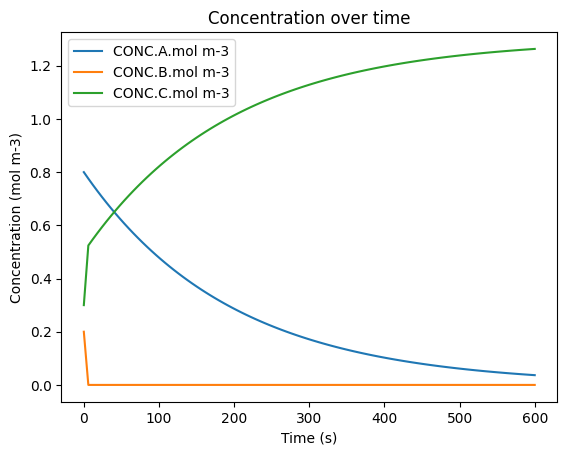

In [1]:
from acom_music_box import MusicBox, Examples
import matplotlib.pyplot as plt
import logging
import sys

logging.disable(sys.maxsize) # Prevents log spam when running this cell

box_model = MusicBox()
conditions_path = Examples.Analytical.path
box_model.loadJson(conditions_path)
df = box_model.solve()
display(df)
df.plot(x='time.s', y=['CONC.A.mol m-3', 'CONC.B.mol m-3', 'CONC.C.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()

## Loading a Custom JSON Box Model Configuration

Loading your own JSON file is incredibly similar to loading a pre-made example, you just provide a path to your own configuration rather than an instance of the Examples class.</br>
To do so with a file called chapman.v1.config.json in the config subfolder:

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.Ar.mol m-3,CONC.CO2.mol m-3,CONC.H2O.mol m-3,CONC.N2.mol m-3,CONC.O.mol m-3,CONC.O1D.mol m-3,CONC.O2.mol m-3,CONC.O3.mol m-3
0,0.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,3.580000e-11,1.830000e-17,0.162000,0.000006
1,60.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
2,120.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
3,180.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
4,240.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,0.000000e+00,0.000000e+00,0.162000,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,258960.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.553605e-11,4.828101e-17,0.161998,0.000008
4317,259020.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.553831e-11,4.828246e-17,0.161998,0.000008
4318,259080.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.554057e-11,4.828391e-17,0.161998,0.000008
4319,259140.0,217.6,1394.3,0.770661,0.00771,0.000308,0.0231,0.601,7.554284e-11,4.828536e-17,0.161998,0.000008


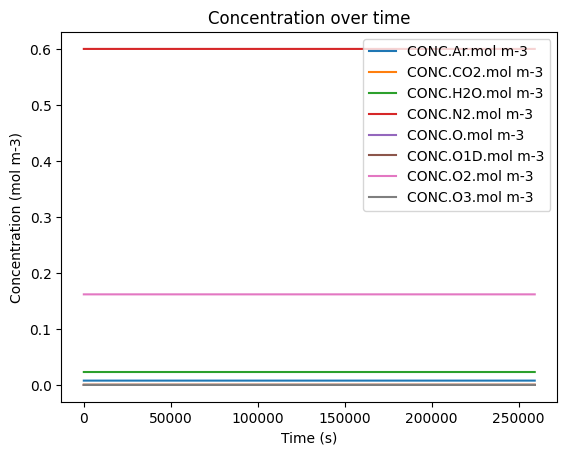

In [2]:
from acom_music_box import MusicBox
import matplotlib.pyplot as plt
import logging
import sys
import os

logging.disable(sys.maxsize) # Prevents log spam when running this cell

box_model = MusicBox()
conditions_path = os.path.abspath("config/chapman.v1.config.json")
box_model.loadJson(conditions_path)
df = box_model.solve()
display(df)
df.plot(x='time.s', y=['CONC.Ar.mol m-3', 'CONC.CO2.mol m-3', 'CONC.H2O.mol m-3', 'CONC.N2.mol m-3', 'CONC.O.mol m-3', 'CONC.O1D.mol m-3', 'CONC.O2.mol m-3', 'CONC.O3.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()